For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

* Has the network latency gone up since we switched internet service providers?
* Is the website redesign any good?
* Is our television ad driving more sales?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from pydataset import data
from scipy import stats

In [2]:
# Null Hypothesis: The network letency has not gone up since we switched ISPs
# Alternate Hypothesis: The network letency has gone up since we switched ISPs

# True Positive: Latency was measured and it did go up from 50ms to 100ms
# True Negative: Latency was measured and it did not go up. It was measured at 50ms before the switch and has remained at 50ms.

# False Positive (Type I): The latency seems to have gone up but has not gone up.
# False Negative (Type II): The latency does no seem to have gone up but actually has.

In [3]:
# Null Hypothesis: The website redesign is not any good.
# Alternate Hypothesis:  The website redesign is good.

# True Positive: The website redesign is actually good. Customer feedback shows more positive responses to it than the old one.
# True Negative: The website redesign is actually not good. Customer feedback shows more negative responses to it than the old one.

# False Positive (Type I): The website redesign appears to be good but actually has many hidden bugs and errors and other issues.
# False Negative (Type II): The website redesign appears to be bad, but in fact runs much smoother and functions better.

In [4]:
# Null Hypothesis: Our television ad is not driving more sales.
# Alternate Hypothesis: Our television ad is driving more sales.

# True Positive: The television ads have brought more customers into the store after they watched the ad.
# True Negative:  The television ads have nor brought more customers into the store after they watched the ad.

# False Positive (Type I): There was an increase in sales, but this was due to regular sales fluctuations and not increased sales 
# caused by the ad. Without the ad sales would have still increased.
# False Negative (Type II): There was no increase in sales, but this was due to regular sales fluctuations being lower, causing a 
# percieved lack of change in sales. Without the ad, sales would have been even lower.

# Comparison of Groups Exercises

1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

                    Codeup Student	  Not Codeup Student
Uses a Macbook	         49                 20
Doesn't Use A Macbook	  1	                30

In [5]:
mac = pd.DataFrame([[49,20],[1,30]],columns = ['CodeUp_Student','Not_Codeup_Student']) # Create data frame with information
mac

,CodeUp_Student,Not_Codeup_Student
0,49,20
1,1,30


In [6]:
chi, p, degf, exp = stats.chi2_contingency(mac)
chi, p, degf, exp

(36.65264142122487,
 1.4116760526193828e-09,
 1,
 array([[34.5, 34.5],
        [15.5, 15.5]]))

In [7]:
# There is a very strong correlation between using a Mac and being a CodeUp student.
# I believe that using a mac is dependent on being a CodeUp student

2, Choose another 2 categorical variables from the mpg dataset.

* State your null and alternative hypotheses.
* State your alpha.
* Perform a chi^2 test of independence.
* State your conclusion

In [8]:
mpg = data('mpg')
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [9]:
mpg['age'] = pd.qcut(mpg.year,2,labels=['old','new'])
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,age
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,old
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,old
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,new


In [10]:
mpg['avg_mpg'] = (mpg.hwy + mpg.cty)/2
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,age,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,old,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,old,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,new,25.5


In [11]:
mpg['mpg_cat'] = pd.qcut(mpg.avg_mpg,2,labels = ['low_mpg','high_mpg'])
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,age,avg_mpg,mpg_cat
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,old,23.5,high_mpg
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,old,25.0,high_mpg
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,new,25.5,high_mpg


In [12]:
age_mpg = pd.crosstab(mpg.age,mpg.mpg_cat)
age_mpg

mpg_cat,low_mpg,high_mpg
age,,
old,57,60
new,64,53


In [13]:
# Null : There is no correlation between car age and average gas mileage
# Alternate : There is a correlatino between car age and average gas mileage

alpha = 0.10

chi, p, degf, exp = stats.chi2_contingency(age_mpg)
chi, p, degf, exp

(0.6161047319534849,
 0.4324984858656389,
 1,
 array([[60.5, 56.5],
        [60.5, 56.5]]))

In [14]:
if p < alpha:
    print('There is a correlation between car age and average gas mileage.')
else:
    print('There is no correlation between car age and average gas mileage.')

There is no correlation between car age and average gas mileage.


3. Use the data from the employees database to answer these questions:

* Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
* Is an employee's gender independent of whether or not they are or have been a manager?

In [15]:
import env
from sqlalchemy import text, create_engine

url = env.get_connection('employees')
engine = create_engine(url)
sal = text('''
        SELECT * FROM employees as E
        JOIN dept_emp as DE USING(emp_no)
        JOIN departments as D USING(dept_no)
        WHERE to_date > CURDATE()
        ''')
s = pd.read_sql(sal,engine.connect())
s

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
0,d009,10038,1960-07-20,Huan,Lortz,M,1989-09-20,1989-09-20,9999-01-01,Customer Service
1,d009,10049,1961-04-24,Basil,Tramer,F,1992-05-04,1992-05-04,9999-01-01,Customer Service
2,d009,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02,1992-11-11,9999-01-01,Customer Service
3,d009,10088,1954-02-25,Jungsoon,Syrzycki,F,1988-09-02,1992-03-21,9999-01-01,Customer Service
4,d009,10112,1963-08-13,Yuichiro,Swick,F,1985-10-08,1998-05-01,9999-01-01,Customer Service
...,...,...,...,...,...,...,...,...,...,...
240119,d007,499966,1955-12-04,Mihalis,Crabtree,F,1985-06-13,1985-06-13,9999-01-01,Sales
240120,d007,499976,1963-08-20,Guozhong,Felder,M,1988-12-26,1988-12-26,9999-01-01,Sales
240121,d007,499980,1959-06-28,Gino,Usery,M,1991-02-11,1991-02-11,9999-01-01,Sales
240122,d007,499986,1952-07-22,Nathan,Ranta,F,1985-08-11,1985-08-11,9999-01-01,Sales


In [16]:
smg = s[(s.dept_name == 'Sales') | (s.dept_name == 'Marketing')]
smg.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
104290,d001,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,1993-08-03,9999-01-01,Marketing
104291,d001,10058,1954-10-01,Berhard,McFarlin,M,1987-04-13,1988-04-25,9999-01-01,Marketing
104292,d001,10140,1957-03-11,Yucel,Auria,F,1991-03-14,1991-03-14,9999-01-01,Marketing
104293,d001,10228,1953-04-21,Karoline,Cesareni,F,1991-08-26,1993-01-28,9999-01-01,Marketing
104294,d001,10239,1955-03-31,Nikolaos,Llado,F,1995-05-08,1996-05-04,9999-01-01,Marketing


In [17]:
smg_ct = pd.crosstab(smg.gender,smg.dept_name)
smg_ct

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [18]:
chi, p, degf, exp = stats.chi2_contingency(smg_ct)
chi, p, degf, exp

(0.3240332004060638,
 0.5691938610810126,
 1,
 array([[ 5893.2426013, 14969.7573987],
        [ 8948.7573987, 22731.2426013]]))

In [19]:
if p < alpha:
    print('There is a correlation between gender and working on sales or marketing.')
else:
    print('There is no correlation between gender and working on sales or marketing.')

There is no correlation between gender and working on sales or marketing.


In [20]:
manager = text('''
        SELECT * FROM dept_manager as DM
        RIGHT JOIN employees as E USING(emp_no)
        ''')
mng = pd.read_sql(manager,engine.connect())
mng

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,None,None,None
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,None,None,None
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,None,None,None
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,None,None,None
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,None,None,None
...,...,...,...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,None,None,None
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27,None,None,None
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,None,None,None
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,None,None,None


In [21]:
mng['manager'] = np.where(mng.dept_no.isnull(),'No','Yes')
mng.manager.value_counts()

No     300000
Yes        24
Name: manager, dtype: int64

In [22]:
mng.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date,to_date,manager
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,None,None,None,No
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,None,None,None,No
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,None,None,None,No
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,None,None,None,No
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,None,None,None,No


In [23]:
m = pd.crosstab(mng.gender,mng.manager)
m

manager,No,Yes
gender,,
F,120038,13
M,179962,11


In [24]:
chi, p, degf, exp = stats.chi2_contingency(m)
chi, p, degf, exp

(1.4566857643547197,
 0.22745818732810363,
 1,
 array([[1.20041397e+05, 9.60331174e+00],
        [1.79958603e+05, 1.43966883e+01]]))

In [25]:
if p < alpha:
    print('There is a correlation between gender and being a manager.')
else:
    print('There is no correlation between gender and being a manager.')

There is no correlation between gender and being a manager.


# Correlation Exercises

1. Answer with the type of stats test you would use (assume normal distribution):

* Is there a relationship between the length of your arm and the length of your foot?
* Does smoking affect when or not someone has lung cancer?
* Is gender independent of a person’s blood type?
* Does whether or not a person has a cat or dog affect whether they live in an apartment?
* Does the length of time of the lecture correlate with a student's grade?


In [26]:
# Pearson Test
# Chi Test
# Chi Test
# Chi Test
# Pearson Test

2. Use the telco_churn data.

* Does tenure correlate with monthly charges?
* Total charges?
* What happens if you control for phone and internet service?

In [27]:
url = env.get_connection('telco_churn')
engine = create_engine(url)
xx = text('''
        SELECT * FROM customers as C
        JOIN internet_service_types as IST USING(internet_service_type_id)
        WHERE total_charges NOT LIKE '% %'
        ''')
telco = pd.read_sql(xx,engine.connect())
telco.head()

,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type
0,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,...,Yes,Yes,No,2,Yes,2,65.6,593.3,No,DSL
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,...,No,No,Yes,1,No,2,59.9,542.4,No,DSL
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,...,No,No,No,1,Yes,1,73.9,280.85,Yes,Fiber optic
3,2,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,...,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes,Fiber optic
4,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,...,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes,Fiber optic


In [28]:
telco['total_charges'] = telco['total_charges'].astype(float)

In [29]:
r, p = stats.pearsonr(telco['tenure'],telco['monthly_charges'])
r, p
# There is no correlation between monthly charges and tenure

(0.2468617666408956, 3.9898213232510553e-98)

In [30]:
r, p = stats.pearsonr(telco['tenure'],telco['total_charges'])
r, p
# There is a correlation between tenure and total_charges

(0.8258804609332071, 0.0)

In [31]:
url = env.get_connection('telco_churn')
engine = create_engine(url)
xx = text('''
        SELECT * FROM customers as C
        JOIN internet_service_types as IST USING(internet_service_type_id)
        WHERE total_charges NOT LIKE '% %' AND internet_service_type != 'None' AND phone_service = 'Yes'
        ''')
tpi = pd.read_sql(xx,engine.connect())
tpi.head()

,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type
0,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,...,Yes,Yes,No,2,Yes,2,65.6,593.3,No,DSL
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,...,No,No,Yes,1,No,2,59.9,542.4,No,DSL
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,...,No,No,No,1,Yes,1,73.9,280.85,Yes,Fiber optic
3,2,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,...,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes,Fiber optic
4,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,...,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes,Fiber optic


In [32]:
r, p = stats.pearsonr(tpi['tenure'],tpi['monthly_charges'])
r, p
# There is no correlation

(0.4429835314205348, 1.998548108068337e-231)

In [33]:
tpi['total_charges'] = tpi['total_charges'].astype(float)
r, p = stats.pearsonr(tpi['tenure'],tpi['total_charges'])
r, p
# There is a correlation

(0.9579229778029177, 0.0)

3. Use the employees database.
* Is there a relationship between how long an employee has been with the company and their salary?
* Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [34]:
url = env.get_connection('employees')
engine = create_engine(url)
xx = text('''
        SELECT * FROM employees as E
        JOIN salaries as S USING(emp_no)
        WHERE to_date > CURDATE()
        ''')
emp = pd.read_sql(xx,engine.connect())
emp.head(3)

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01


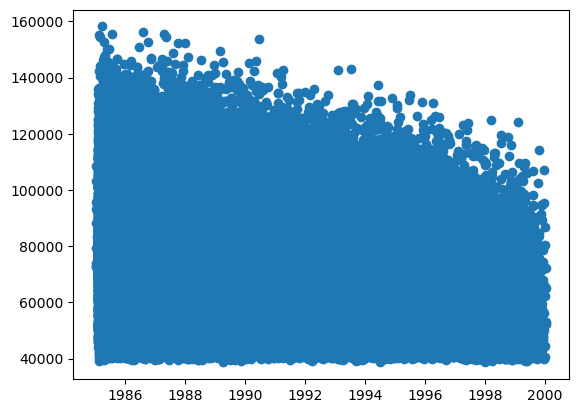

In [35]:
plt.scatter(emp.hire_date,emp.salary)

In [36]:
emp['hire_year'] = (emp['hire_date'].astype(str).str[:4]).astype(int)

In [37]:
r, p = stats.pearsonr(emp['hire_year'],emp['salary'])
r, p

(-0.30516011224145856, 0.0)

In [38]:
url = env.get_connection('employees')
engine = create_engine(url)
xx = text('''
         SELECT * FROM employees as E
  JOIN (SELECT emp_no, COUNT(title) AS titles FROM employees as E
        JOIN titles as T USING(emp_no)
        GROUP BY emp_no) as T
        USING(emp_no)
        ''')
titles = pd.read_sql(xx,engine.connect())
titles.head(3)

,emp_no,birth_date,first_name,last_name,gender,hire_date,titles
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,1
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,1
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,1


In [39]:
titles['years_worked'] = 2023 - ((titles['hire_date'].astype(str).str[:4]).astype(int))
r, p = stats.pearsonr(titles['years_worked'],titles['titles'])
r, p

(0.26579423585188955, 0.0)

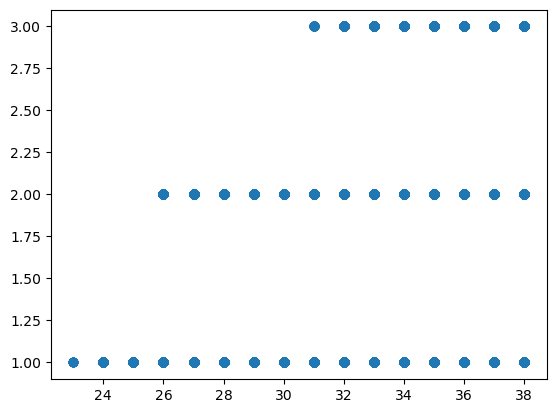

In [40]:
plt.scatter(titles['years_worked'],titles['titles'])

4. Use the sleepstudy data.
* Is there a relationship between days and reaction time?

In [41]:
s = data('sleepstudy')
s

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


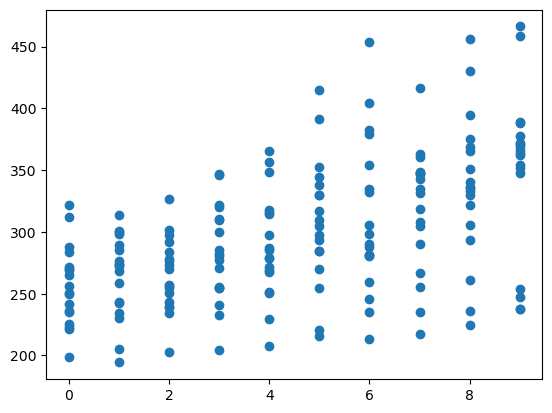

In [42]:
plt.scatter(s.Days,s.Reaction)

In [43]:
r, p = stats.pearsonr(s.Days,s.Reaction)
r, p

(0.5352302262650255, 9.89409632221439e-15)

# Comparison of Means

1. Answer with the type of test you would use (assume normal distribution):

* Is there a difference in grades of students on the second floor compared to grades of all students?
* Are adults who drink milk taller than adults who don't drink milk?
* Is the price of gas higher in Texas or in New Mexico?
* Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?


In [44]:
# 1 Sample 2 Tails
# One Sample T-Test

# 2 Samples 1 Tail
# Independent T-Test

# 2 Samples 1 Tail
# Independent T-Test

# 3 Samples 2 Tails
# ANOVA Analysis of Variance

2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from pydataset import data
rng = np.random.default_rng(seed = 100) # create generator

In [46]:
a = 0.05

o_one = rng.normal(90,15,40) # 90 days mean, 15 days standard deviation, 40 items

o_two = rng.normal(100,20,50)

In [47]:
# Null: The average time it takes to sell homes in office one IS NOT different from office two.
# Alternate: The average time it takes to sell homes in office one IS different from office two.

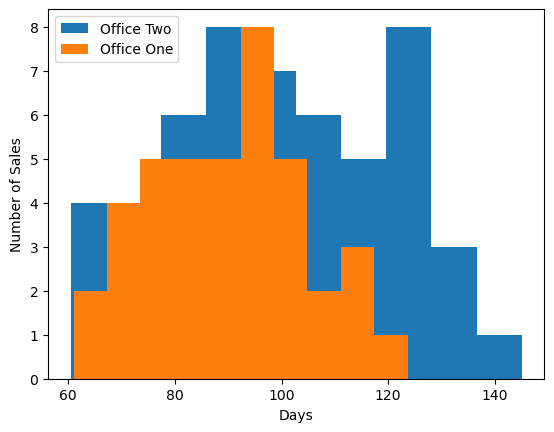

In [48]:
plt.hist(o_two,label='Office Two')
plt.hist(o_one,label='Office One')
plt.xlabel('Days')
plt.ylabel('Number of Sales')
plt.legend()
plt.show()

In [50]:
t, p = stats.ttest_ind(o_one,o_two)
t, p
# Negative value indicates office one takes less days on average to sell a house than office two.

(-2.9163778224966017, 0.0044922298482133255)

In [53]:
if p < a:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.


3. Load the mpg dataset and use it to answer the following questions:

* Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
* Are compact cars more fuel-efficient than the average car?
* Do manual cars get better gas mileage than automatic cars?

In [91]:
# Null: There IS NO difference in fuel-efficiency in cars from 2008 vs 1999.
# Alternate: There IS a difference in fuel-efficiency in cars from 2008 vs 1999.

In [56]:
mpg = data('mpg')
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [62]:
mpg['avg_mpg'] = ( mpg['cty'] + mpg['hwy'] ) / 2
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5


In [63]:
old_cars = mpg[mpg['year'] == 1999]
new_cars = mpg[mpg['year'] == 2008]

In [81]:
old_fuel = old_cars['avg_mpg']
new_fuel = new_cars['avg_mpg']

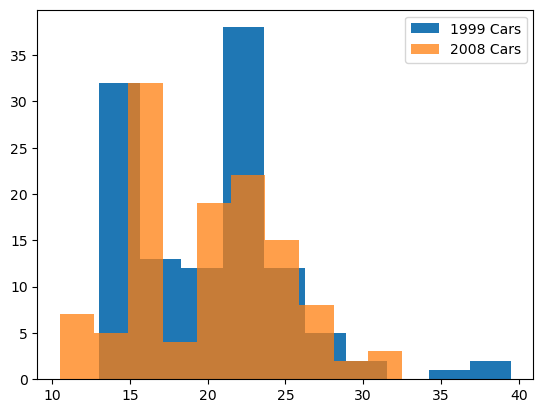

In [90]:
plt.hist(old_fuel, alpha=1,label='1999 Cars')
plt.hist(new_fuel, alpha=0.75, label='2008 Cars')
#plt.hist(old_fuel, label='1999 Cars')
plt.legend()
plt.show()

In [93]:
t, p = stats.ttest_ind(old_fuel,new_fuel)
t, p
# Old cars have a slighty higher fuel efficiency in this sample. P-value is very high.

(0.21960177245940962, 0.8263744040323578)

In [94]:
if p < a:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


* Are compact cars more fuel-efficient than the average car?

In [119]:
# Null: Compact cars are as equally fuel-efficient as the average car.
# Alternate: Compact cars are MORE fuel-efficient than the average car.

In [97]:
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5


In [99]:
mpg['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [100]:
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [101]:
comp = mpg[mpg['class'] == 'compact']

In [104]:
comp.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5


In [113]:
comp_mpg = comp['avg_mpg'].mean()
all_mpg = mpg['avg_mpg'].mean()

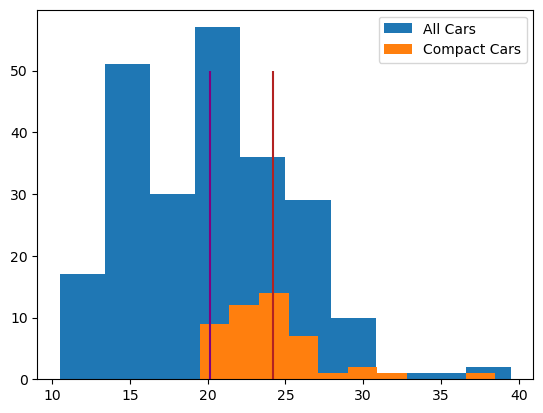

In [114]:
plt.hist(mpg['avg_mpg'], alpha=1, label='All Cars')
plt.hist(comp['avg_mpg'], alpha=1,label='Compact Cars')
#plt.hist(mpg['avg_mpg'], alpha=1, label='All Cars')
plt.vlines(comp_mpg,0,50,color='firebrick')
plt.vlines(all_mpg,0,50,color='purple')
plt.legend()
plt.show()

In [118]:
t, p = stats.ttest_1samp(comp['avg_mpg'],all_mpg)
t, p
# Compact cars have a significantly higher fuel-efficiency compared to all cars.

(7.896888573132533, 4.1985637943171486e-10)

In [120]:
if p/2 < a and t > 0:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.


Do manual cars get better gas mileage than automatic cars?

In [ ]:
# Null: Manual cars get the same gas mileage as automatic cars.
# Alternate: Manual cars get better gas mileage than automatic cars.

In [121]:
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5


In [122]:
mpg.trans.unique()

array(['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)',
       'auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'],
      dtype=object)

In [127]:
mpg['trans'] = np.where(mpg.trans.str[0] == 'a','auto','manual')
mpg.trans.head()

1      auto
2    manual
3    manual
4      auto
5      auto
Name: trans, dtype: object

In [128]:
auto = mpg[mpg['trans'] =='auto']
manual = mpg[mpg['trans'] =='manual']

In [134]:
auto_gas = auto['avg_mpg']
manual_gas = manual['avg_mpg']

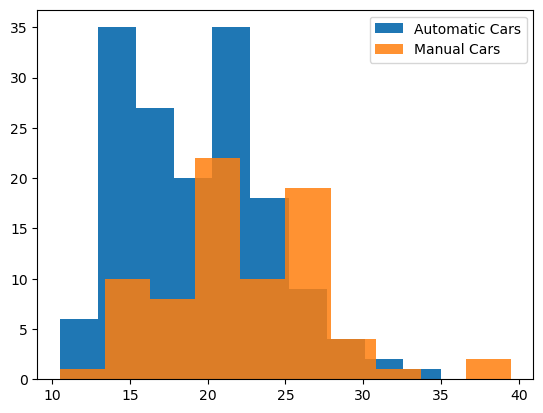

In [138]:
#plt.hist(manual_gas, alpha=1,label='Manual Cars')
plt.hist(auto_gas, alpha=1, label='Automatic Cars')
plt.hist(manual_gas, alpha=0.85,label='Manual Cars')
plt.legend()
plt.show()

In [139]:
t, p = stats.ttest_ind(manual_gas,auto_gas)
t, p

(4.593437735750014, 7.154374401145685e-06)

In [143]:
if p / 2 > a:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We reject the null hypothesis
